In [ ]:
import re
import pandas as pd
import numpy as np
from scipy.stats import spearmanr, pearsonr
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Reading the train csv

In [ ]:
df = pd.read_csv('hau_train.csv')
df.head()

,PairID,Text,Score
0,hau_train_00001,Haka ya furta a cikin jawabin sa na murnar cik...,0.94
1,hau_train_00002,RASHIN TSARO: ‘Yan bindiga sun arce da Kwamish...,0.29
2,hau_train_00003,Amma ana saura kwana ɗaya sai ya kira ɗan taka...,0.15
3,hau_train_00004,"Buhari ya tashi zuwa Saudiyya, zai yi Umra ta ...",0.31
4,hau_train_00005,Gusau ya ce masu son kawo tashin hankali a ƙas...,0.15


Writing a function to split the sentences and calculate dice coefficent

In [ ]:
def dice_score(s1,s2):
    s1 = s1.lower()
    s1_split = re.findall(r"\w+|[^\w\s]", s1, re.UNICODE)

    s2 = s2.lower()
    s2_split = re.findall(r"\w+|[^\w\s]", s2, re.UNICODE)

    dice_coef = len(set(s1_split).intersection(set(s2_split))) / (len(set(s1_split)) + len(set(s2_split)))
    return round(dice_coef, 2)


Predicting scores using the function created

In [ ]:
true_scores = df['Score'].values
pred_scores = []

for index,row in df.iterrows():
  s1,s2 = row["Text"].split("\n")

  # Overlap score
  pred_scores.append(dice_score(s1,s2))


In [ ]:
pred_scores[0]

0.38

In [ ]:
print("Pearson Correlation:", round(pearsonr(true_scores,pred_scores)[0],2))

Pearson Correlation: 0.4


In [ ]:
df['Pred_Score'] = pred_scores
df.head()

,PairID,Text,Score,Pred_Score
0,hau_train_00001,Haka ya furta a cikin jawabin sa na murnar cik...,0.94,0.38
1,hau_train_00002,RASHIN TSARO: ‘Yan bindiga sun arce da Kwamish...,0.29,0.15
2,hau_train_00003,Amma ana saura kwana ɗaya sai ya kira ɗan taka...,0.15,0.15
3,hau_train_00004,"Buhari ya tashi zuwa Saudiyya, zai yi Umra ta ...",0.31,0.13
4,hau_train_00005,Gusau ya ce masu son kawo tashin hankali a ƙas...,0.15,0.13


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(true_scores, pred_scores)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.13920794930875577


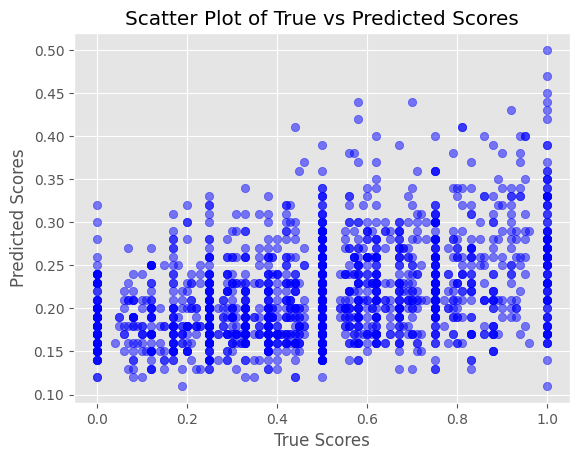

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(true_scores, pred_scores, color='blue', alpha=0.5)

# Set plot labels and title
plt.xlabel('True Scores')
plt.ylabel('Predicted Scores')
plt.title('Scatter Plot of True vs Predicted Scores')

# Display the plot
plt.show()